An autoencoder is a neural network that learns to copy its input to its output

An Autoencoder can be divided into two parts: the encoder and the decoder. The encoder is a mapping from the input space into a lower dimensional latent space (bottle neck layer). 

At this stage it is nothing but low dimensional representations of data in an unsupervised manner

And what is does here is nothing but dimenstionality reduction similar to what PCA does

the potential of Autoencoders resides in their non-linearity, allowing the model to learn more powerful generalizations compared to PCA, and to reconstruct back the input with a significantly lower loss of information

The decoder is a mapping from the low dimension latent space into the reconstruction space with a dimensionality equal to the input space

The output in reconstruction space is close to similar to input but there is some loss of information this is called as reconstruction error

One potential use case of autoencoders is anomaly detection

This is more useful when we have very few negative cases and classes are imbalnced but it can be used in normal scenrio as well where labelling is hard

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest #IMP

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df=df.set_index('timestamp').resample("H").mean().reset_index()

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
df['hour']=df.timestamp.dt.hour

In [ ]:
#IMP: read about 'strftime'
df['weekday']=pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int64         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.4 KB


In [ ]:
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


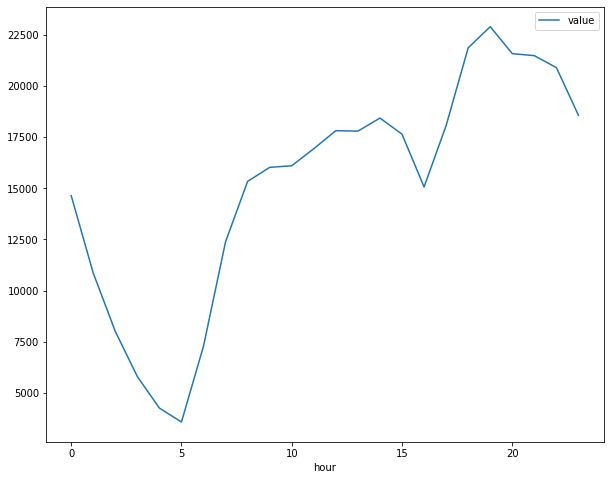

In [ ]:
df[['value','hour']].groupby('hour').mean().plot()

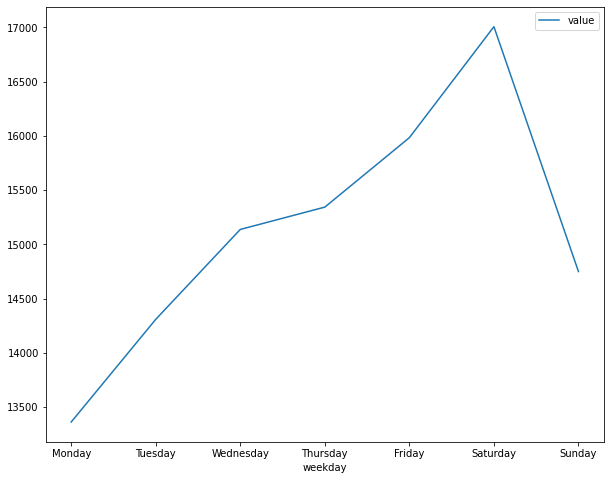

In [ ]:
df[['value','weekday']].groupby('weekday').mean().plot()

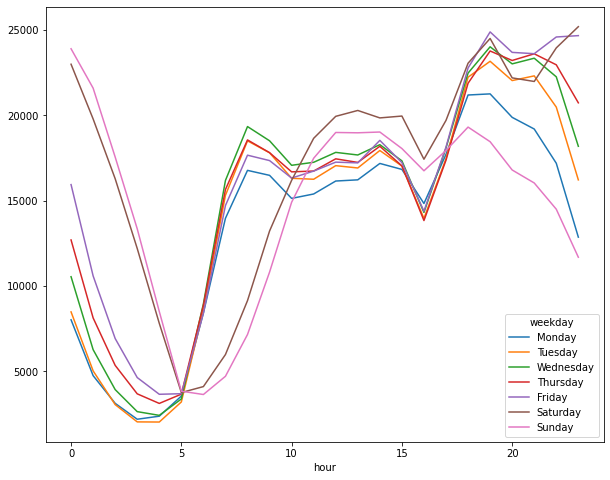

In [ ]:
df.groupby(['hour', 'weekday']).mean()['value'].unstack().plot()

In [ ]:
df.join(df.groupby(['hour', 'weekday'])['value'].mean(), on=['hour','weekday'], rsuffix='_avg')

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


In [ ]:
df_final=df.join(df.groupby(['hour', 'weekday'])['value'].mean(), on=['hour','weekday'], rsuffix='_avg')

In [ ]:
df_final

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27
Christmas - 2014-12-25
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27```



In [ ]:
df_final.set_index('timestamp').loc['2014-11-02']

,value,hour,weekday,value_avg
timestamp,,,,
2014-11-02 00:00:00,24109.5,0,Sunday,23898.733333
2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333
2014-11-02 02:00:00,12754.5,2,Sunday,17555.266667
2014-11-02 03:00:00,8955.5,3,Sunday,13350.550000
2014-11-02 04:00:00,5453.5,4,Sunday,8506.500000
2014-11-02 05:00:00,5174.0,5,Sunday,3837.450000
2014-11-02 06:00:00,4920.0,6,Sunday,3643.983333
2014-11-02 07:00:00,5592.0,7,Sunday,4711.300000
2014-11-02 08:00:00,7525.5,8,Sunday,7159.516667


In [ ]:
df_final.set_index('timestamp').loc['2015-01-26':'2015-01-27']

,value,hour,weekday,value_avg
timestamp,,,,
2015-01-26 00:00:00,5907.0,0,Monday,8020.283333
2015-01-26 01:00:00,3649.5,1,Monday,4749.750000
2015-01-26 02:00:00,2310.0,2,Monday,3125.800000
2015-01-26 03:00:00,1949.5,3,Monday,2195.133333
2015-01-26 04:00:00,2165.5,4,Monday,2373.166667
2015-01-26 05:00:00,3723.0,5,Monday,3550.800000
2015-01-26 06:00:00,9146.0,6,Monday,8414.566667
2015-01-26 07:00:00,15835.5,7,Monday,13968.766667
2015-01-26 08:00:00,18804.5,8,Monday,16774.483333


In [ ]:
df_final['day']=df.timestamp.dt.weekday

In [ ]:
df_final

,timestamp,value,hour,weekday,value_avg,day
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5


In [ ]:
data = df_final[['value', 'hour', 'day']]

In [ ]:
model =  IsolationForest(contamination=0.005, max_features=3, max_samples=0.8, n_estimators=200) #IMP
model.fit(data) # n_estimators is number of trees to build

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [ ]:
df_final['outliers']=pd.Series(model.predict(data)).apply(lambda x: 'yes' if (x == -1) else 'no' ) #if x = -1 --> Anomaly

In [ ]:
df_final.query('outliers=="yes"')

,timestamp,value,hour,weekday,value_avg,day,outliers
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,8132.564516,3,yes
4418,2015-01-01 02:00:00,25753.5,2,Thursday,5350.209677,3,yes
4419,2015-01-01 03:00:00,22067.0,3,Thursday,3683.177419,3,yes
4511,2015-01-04 23:00:00,8402.0,23,Sunday,11686.450000,6,yes


Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27 #didn't detect as outlier because obviously on Thanksgiving , there would be crowd
Christmas - 2014-12-25 #didn't detect as outlier because obviously on christmas, there would be crowd
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27```



In [ ]:
df_final

,timestamp,value,hour,weekday,value_avg,day,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no
...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5,no
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5,no
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5,no
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5,no


In [ ]:
fig = px.scatter(df_final, x='timestamp', y='value', color='outliers', hover_data=['weekday','hour','value_avg'], title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
score=model.decision_function(data)

In [ ]:
score

array([0.10382026, 0.14407492, 0.15963193, ..., 0.14430877, 0.12067516,
       0.10502142])

(array([  1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   2.,   2.,   2.,   5.,   0.,   4.,   5.,   2.,   8.,   5.,
          9.,  12.,  14.,  15.,  29.,  40.,  41.,  64.,  67.,  78., 112.,
        117., 139., 185., 204., 266., 347., 391., 397., 442., 457., 417.,
        386., 287., 200., 182., 153.,  70.]),
 array([-0.13733378, -0.13047985, -0.12362591, -0.11677198, -0.10991805,
        -0.10306411, -0.09621018, -0.08935625, -0.08250232, -0.07564838,
        -0.06879445, -0.06194052, -0.05508658, -0.04823265, -0.04137872,
        -0.03452478, -0.02767085, -0.02081692, -0.01396298, -0.00710905,
        -0.00025512,  0.00659881,  0.01345275,  0.02030668,  0.02716061,
         0.03401455,  0.04086848,  0.04772241,  0.05457635,  0.06143028,
         0.06828421,  0.07513815,  0.08199208,  0.08884601,  0.09569994,
         0.10255388,  0.10940781,  0.11626174,  0.12311568,  0.12996961,
         0.13682354,  0.14367748,  0.15053141,  0.15738534,  0.16423928,
 

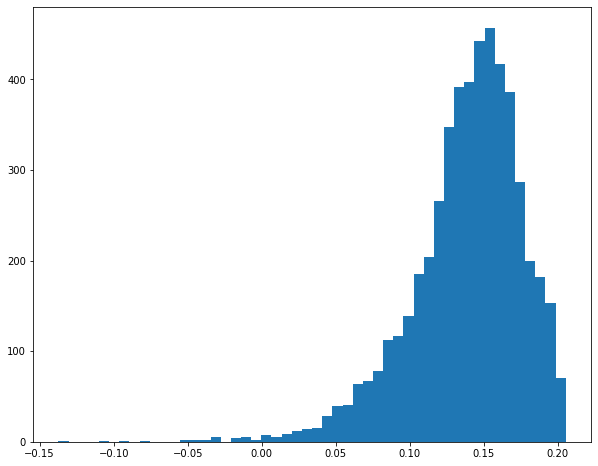

In [ ]:
plt.hist(score, bins=50)

In [ ]:
df_final['scores'] = score

In [ ]:
df_final

,timestamp,value,hour,weekday,value_avg,day,outliers,scores
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no,0.103820
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no,0.144075
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no,0.159632
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no,0.167023
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no,0.170649
...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5,no,0.039071
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5,no,0.152253
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5,no,0.144309
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5,no,0.120675


In [ ]:
df_final.query('scores<-0.02') #-0.02 selected as per histogram

,timestamp,value,hour,weekday,value_avg,day,outliers,scores
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes,-0.034822
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes,-0.029173
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes,-0.137334
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes,-0.030384
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes,-0.042759
4417,2015-01-01 01:00:00,29292.0,1,Thursday,8132.564516,3,yes,-0.090219
4418,2015-01-01 02:00:00,25753.5,2,Thursday,5350.209677,3,yes,-0.044981
4511,2015-01-04 23:00:00,8402.0,23,Sunday,11686.450000,6,yes,-0.028060
5035,2015-01-26 19:00:00,4565.5,19,Monday,21255.900000,0,yes,-0.027950
5036,2015-01-26 20:00:00,3630.5,20,Monday,19880.766667,0,yes,-0.030381


#Timeseries anomaly detection using an Autoencoder

#Setup

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

#Load the data

In [ ]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

#Quick look at the data

In [ ]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


#Visualize the data

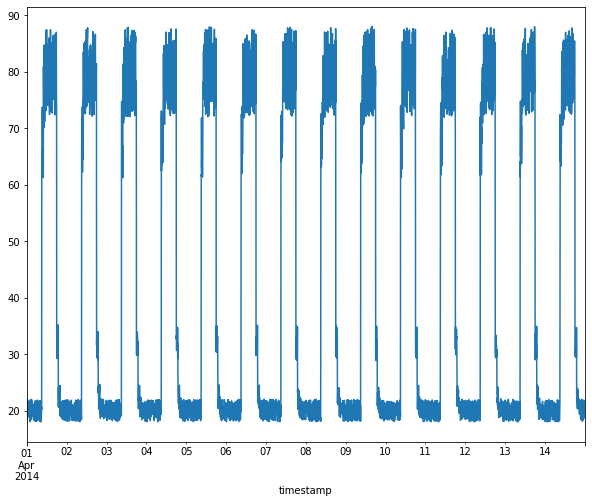

In [ ]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

##Timeseries data with anomalies

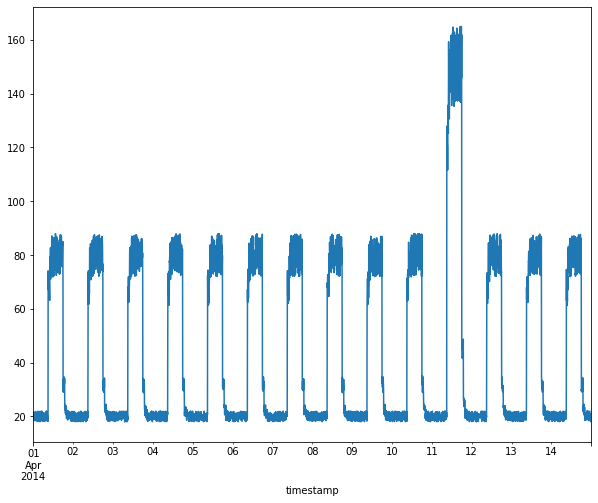

In [ ]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

#Prepare training data


In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


#Create sequences


In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


#Build a model


In [ ]:
#IMP
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

#Train the model


In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 12s 37ms/step - loss: 0.6678 - val_loss: 0.4404
Epoch 2/50
27/27 [==============================] - 0s 9ms/step - loss: 0.1642 - val_loss: 0.0662
Epoch 3/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0592 - val_loss: 0.0425
Epoch 4/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0494 - val_loss: 0.0365
Epoch 5/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0439 - val_loss: 0.0363
Epoch 6/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0397 - val_loss: 0.0346
Epoch 7/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0355 - val_loss: 0.0320
Epoch 8/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0323 - val_loss: 0.0310
Epoch 9/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0298 - val_loss: 0.0309
Epoch 10/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0279 - val_loss: 0.0305
Epoch 11/50
2

#Detecting anomalies


118/118 [==============================] - 1s 4ms/step


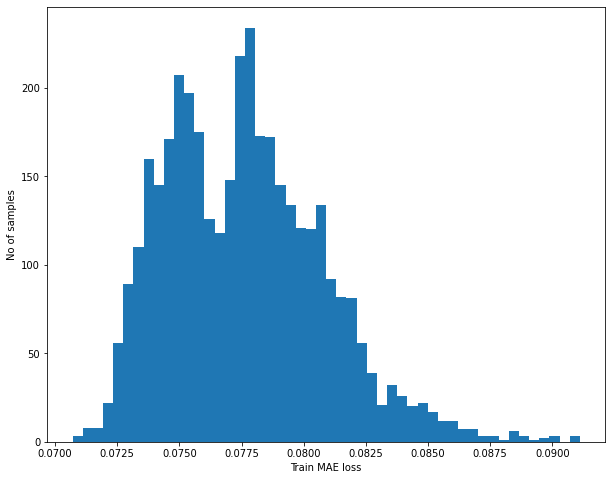

Reconstruction error threshold:  0.09110516455653046


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

## Compare recontruction


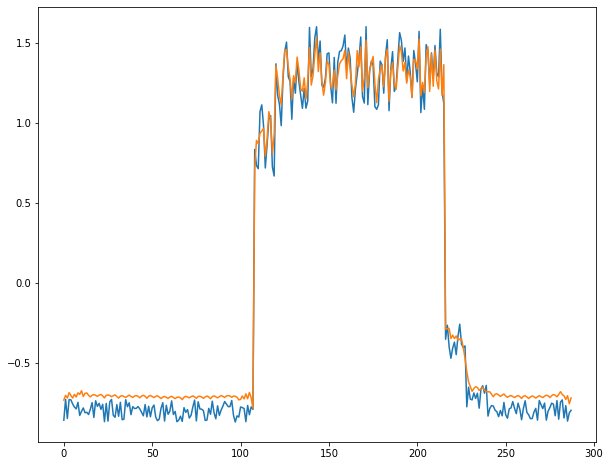

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

## Prepare test data


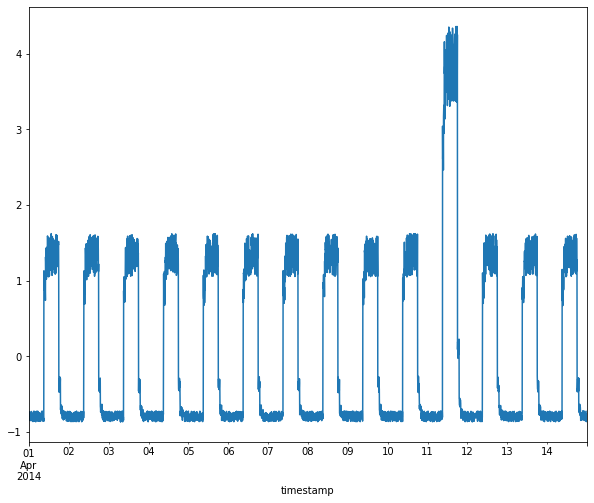

Test input shape:  (3745, 288, 1)
118/118 [==============================] - 0s 3ms/step


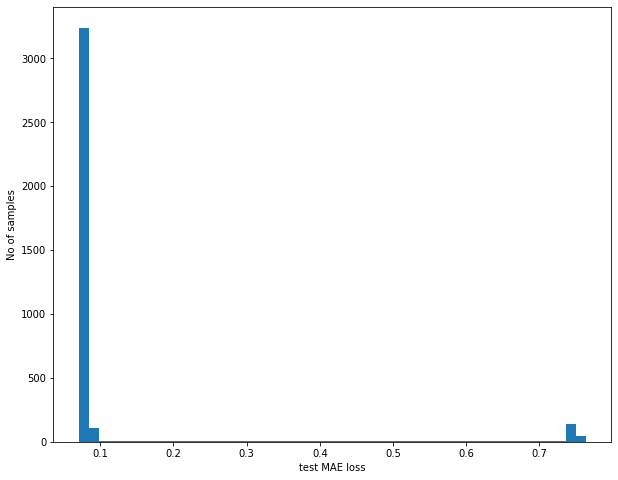

Number of anomaly samples:  397
Indices of anomaly samples:  (array([2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711,
       2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722,
       2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733,
       2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744,
       2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755,
       2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766,
       2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777,
       2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788,
       2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799,
       2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810,
       2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832,
       2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2

In [ ]:
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# Test input shape:  (3745, 288, 1)

## Plot anomalies


In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

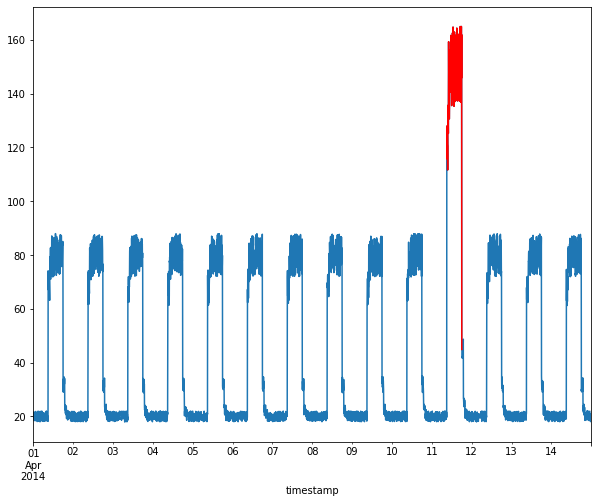

In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()